### Import useful modules

In [1]:
import pandas as pd # dataframes
import numpy as np # numerical library
import seaborn as sns # advanced plotting library
from matplotlib import pyplot as plt # plotting library
%matplotlib inline
# need this in order to display plots in notebook

### Load data

In [2]:
DATA_PATH = '/root/src/data/'

In [3]:
df_items = pd.read_csv(DATA_PATH + 'items.csv', dtype={'item_nbr': np.uint32, 'class': np.uint32, 'perishable': np.bool})

### What does the items data look like?

In [21]:
df_items.head()

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,False
1,99197,GROCERY I,1067,False
2,103501,CLEANING,3008,False
3,103520,GROCERY I,1028,False
4,103665,BREAD/BAKERY,2712,True


### Nulls in items data? Nup

In [5]:
print("Nulls in items columns: {0} => {1}".format(df_items.columns.values, df_items.isnull().any().values))

Nulls in items columns: ['item_nbr' 'family' 'class' 'perishable'] => [False False False False]


# Number of perishable vs nonperishable items

In [6]:
df_items_perishable = df_items[df_items['perishable'] == True]

In [7]:
df_items_nonperishable = df_items[df_items['perishable'] == False]

Total number of items: 4100


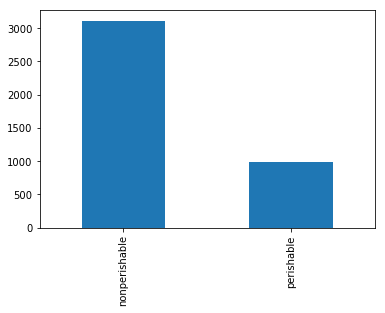

In [8]:
pd.Series(
    {'perishable':
        len(df_items_perishable['item_nbr'].unique()),
     'nonperishable':
         len(df_items_nonperishable['item_nbr'].unique())
    }).plot('bar')

print("Total number of items:", len(df_items['item_nbr'].unique()))

# Number of perishable vs nonperishable items within families

### Number of families? 33

In [9]:
len(df_items['family'].unique())

33

Note: pd.Series.nunique: Return number of unique elements in the object

In [20]:
df_items.head()

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,False
1,99197,GROCERY I,1067,False
2,103501,CLEANING,3008,False
3,103520,GROCERY I,1028,False
4,103665,BREAD/BAKERY,2712,True


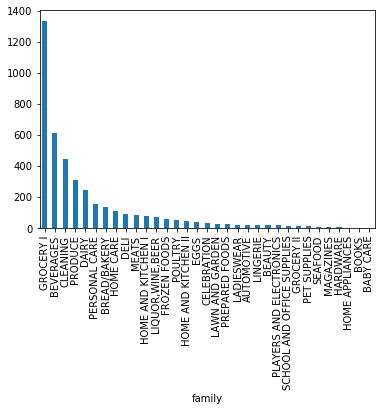

In [10]:
df_items.groupby("family").agg(pd.Series.nunique)[df_items.columns[0]].sort_values(ascending=False).plot('bar')

### Number of families with perishable goods? 9

In [11]:
len(df_items_perishable['family'].unique())

9

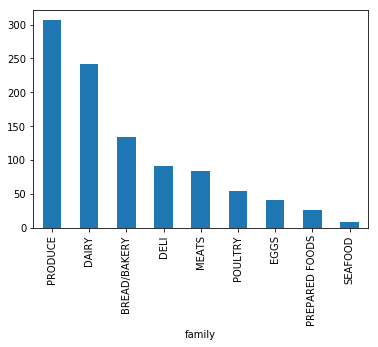

In [12]:
df_items_perishable.groupby("family").agg(pd.Series.nunique)[df_items_perishable.columns[0]].sort_values(ascending=False).plot('bar')

### Number of families without perishable goods? 24

In [13]:
len(df_items_nonperishable['family'].unique())

24

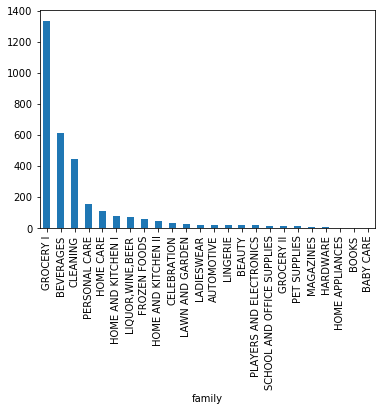

In [14]:
df_items_nonperishable.groupby("family").agg(pd.Series.nunique)[df_items_nonperishable.columns[0]].sort_values(ascending=False).plot('bar')

Summary:
1. 4100 items in total
2. Most items are nonperishable; 3:1 ratio
3. Majority of families do not have any perishable items
4. Number of items in each family varies ALOT. 1/3 of items exist in a single family